# Árvores II - Tarefa I

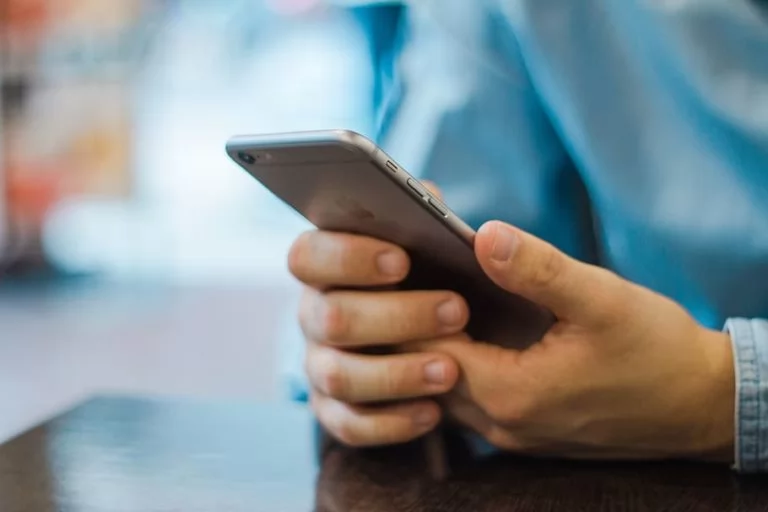  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import zipfile
import os
import requests


In [41]:
# Carregando a lista de features:
features = pd.read_csv(os.path.join(data_dir, 'features.txt'), sep='\s+', header=None, usecols=[1], names=['feature'])
features_list = features['feature'].tolist()

# Resolvendo duplicatas adicionando sufixos:
from collections import Counter

counter = Counter(features_list)
duplicates = {item: count for item, count in counter.items() if count > 1}

# Renomeando duplicatas:
for feature in duplicates:
    for suffix in range(duplicates[feature]):
        index = features_list.index(feature)
        features_list[index] = f"{feature}_{suffix+1}"

# Carregando subject_train.txt
subject_train = pd.read_csv(os.path.join(data_dir, 'train', 'subject_train.txt'), header=None, names=['subject'])

# Carregando X_train.txt com os nomes ajustados
X_train = pd.read_csv(os.path.join(data_dir, 'train', 'X_train.txt'), sep='\s+', header=None, names=features_list)

# Carregando y_train.txt
y_train = pd.read_csv(os.path.join(data_dir, 'train', 'y_train.txt'), header=None, names=['activity'])

# Adicionando o identificador do sujeito ao DataFrame
X_train['subject'] = subject_train['subject']

# Definindo um índice duplo composto pela ordem dos dados e pelo identificador do sujeito
X_train.set_index(['subject', X_train.index], inplace=True)

# Repetindo o processo para a base de teste:

# Carregando subject_test.txt
subject_test = pd.read_csv(os.path.join(data_dir, 'test', 'subject_test.txt'), header=None, names=['subject'])

# Carregando X_test.txt com os nomes ajustados
X_test = pd.read_csv(os.path.join(data_dir, 'test', 'X_test.txt'), sep='\s+', header=None, names=features_list)

# Carregando y_test.txt
y_test = pd.read_csv(os.path.join(data_dir, 'test', 'y_test.txt'), header=None, names=['activity'])

# Adicionando o identificador do sujeito ao DataFrame
X_test['subject'] = subject_test['subject']

# Definindo um índice duplo composto pela ordem do registro e o identificador do sujeito
X_test.set_index(['subject', X_test.index], inplace=True)

# Selecionando as três primeiras colunas de interesse
cols_of_interest = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']
X_train_selected = X_train[cols_of_interest]
X_test_selected = X_test[cols_of_interest]

# Salvando as bases em CSV
X_train_selected.to_csv('X_train_selected.csv')
X_test_selected.to_csv('X_test_selected.csv')


### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

Árvore 1 com ccp_alpha = 6.966745401948242e-06


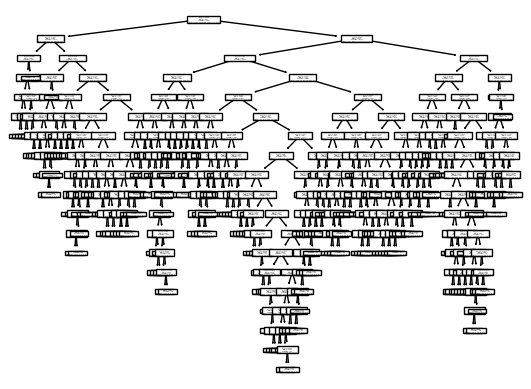

Árvore 2 com ccp_alpha = 4.633972458819549e-05


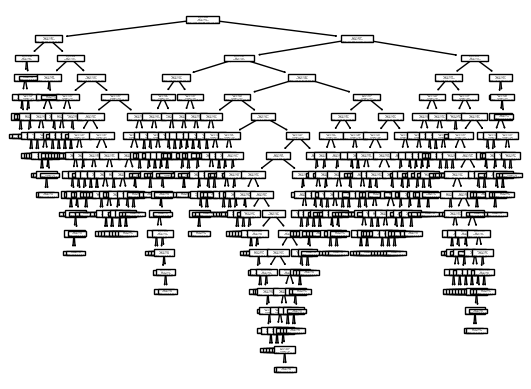

Árvore 3 com ccp_alpha = 6.737688882742601e-05


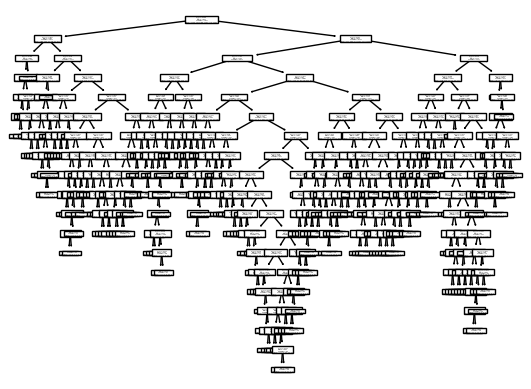

Árvore 4 com ccp_alpha = 8.282224835774233e-05


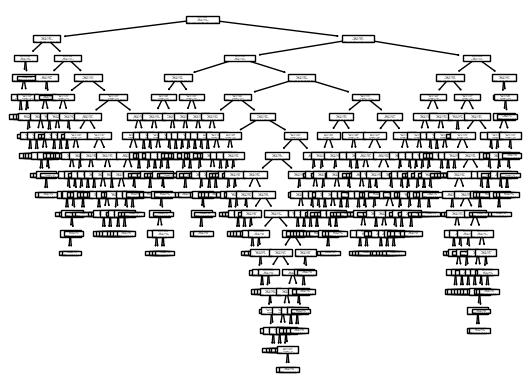

Árvore 5 com ccp_alpha = 0.00010295301538434248


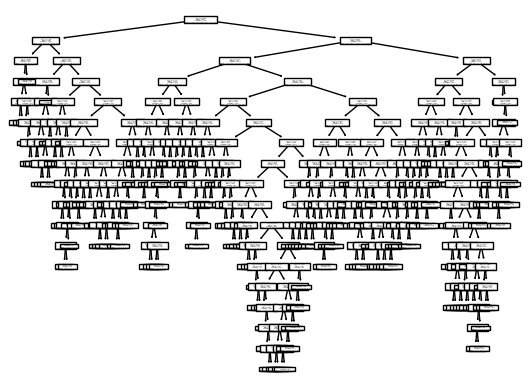

Árvore 6 com ccp_alpha = 0.0001205803606040784


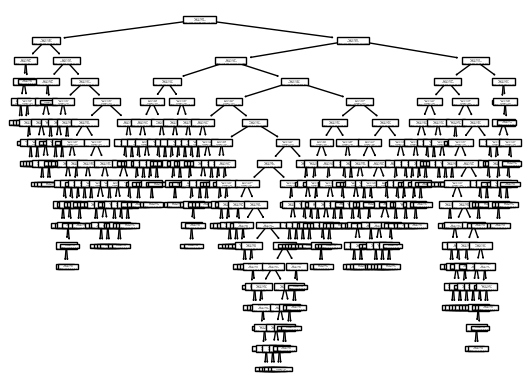

Árvore 7 com ccp_alpha = 0.00014196313819217314


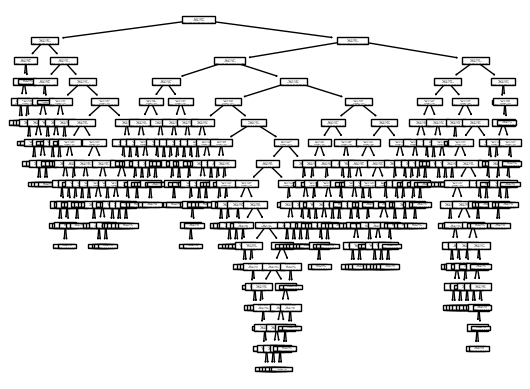

Árvore 8 com ccp_alpha = 0.0001504827538559867


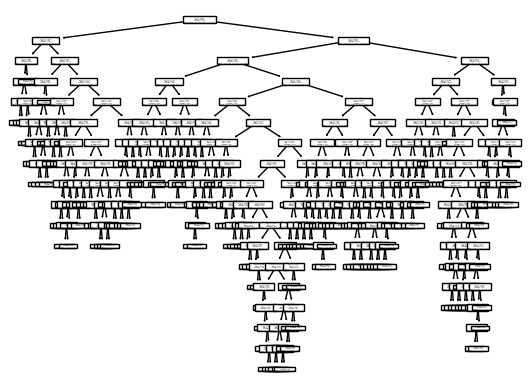

Árvore 9 com ccp_alpha = 0.0001642391471183167


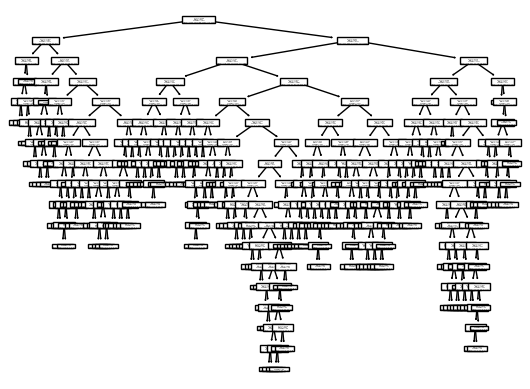

Árvore 10 com ccp_alpha = 0.00017898587315472603


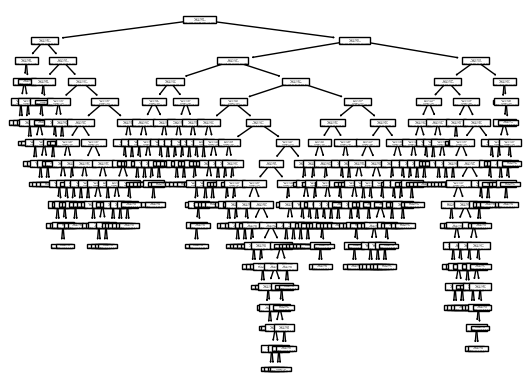

Árvore 11 com ccp_alpha = 0.00018979660165731934


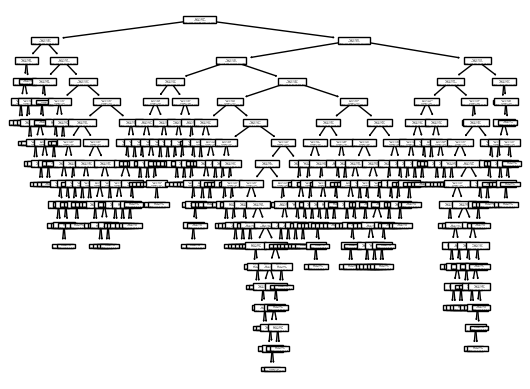

Árvore 12 com ccp_alpha = 0.00020311933260790723


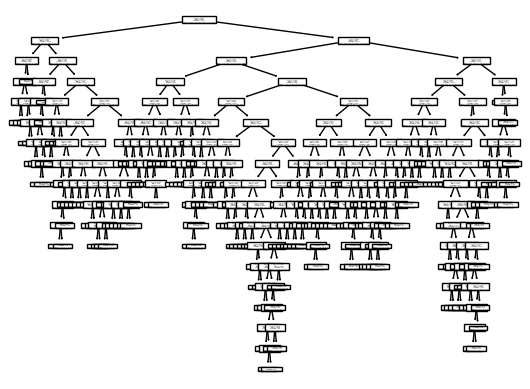

Árvore 13 com ccp_alpha = 0.00020588825845898728


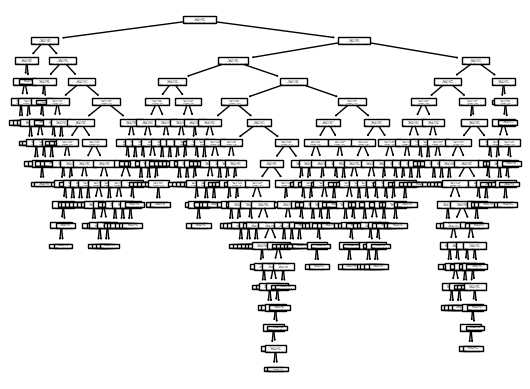

Árvore 14 com ccp_alpha = 0.00021196046427276061


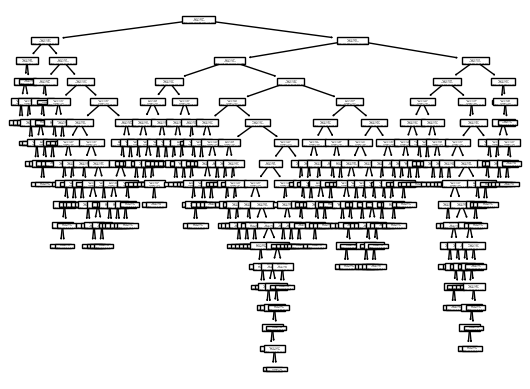

Árvore 15 com ccp_alpha = 0.00022682679746994627


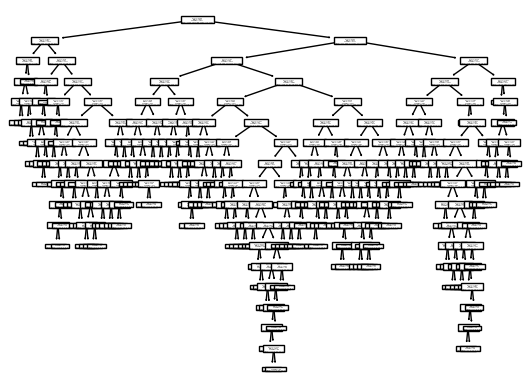

Árvore 16 com ccp_alpha = 0.00023944476959803082


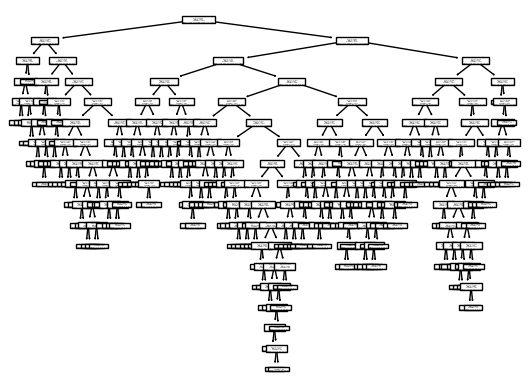

Árvore 17 com ccp_alpha = 0.00024793247731099213


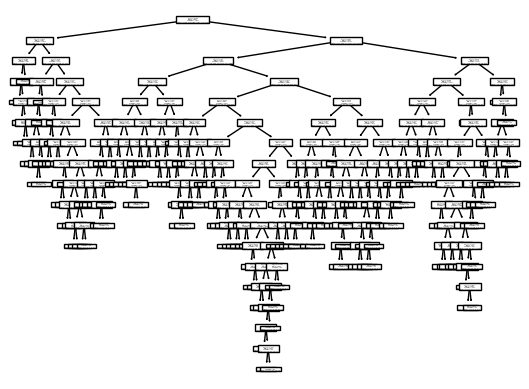

Árvore 18 com ccp_alpha = 0.0002528851771844533


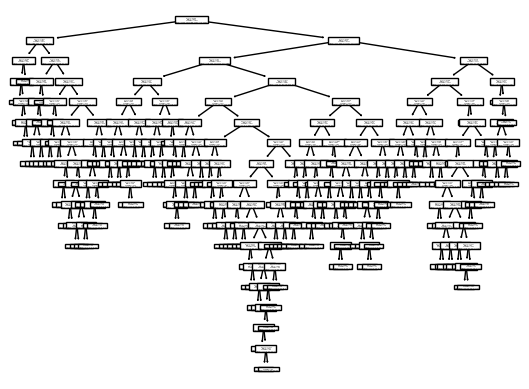

Árvore 19 com ccp_alpha = 0.0002624959371422919


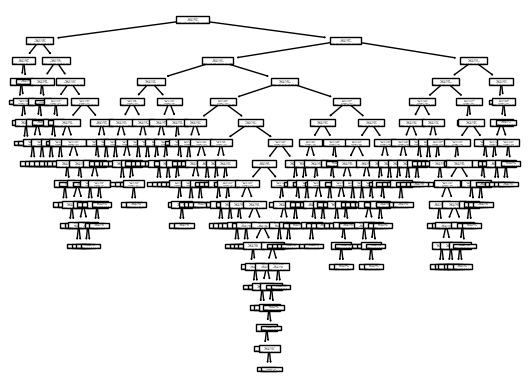

Árvore 20 com ccp_alpha = 0.00027340873369164926


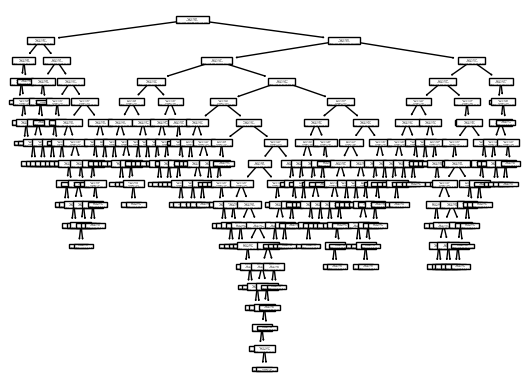

Árvore 21 com ccp_alpha = 0.0002830372948718239


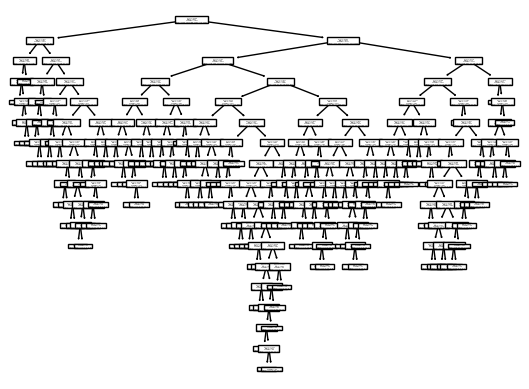

Árvore 22 com ccp_alpha = 0.00028798031892427866


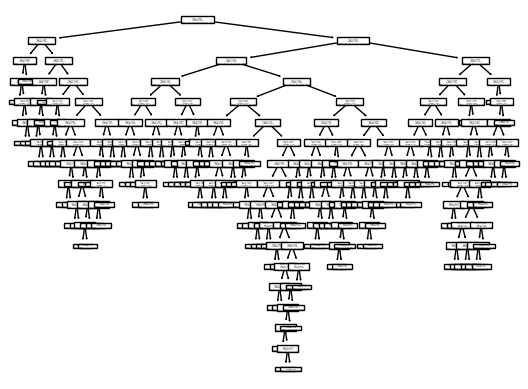

Árvore 23 com ccp_alpha = 0.00031317172009691363


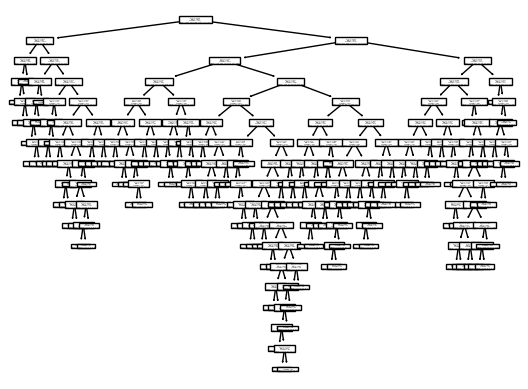

Árvore 24 com ccp_alpha = 0.0003267876210851445


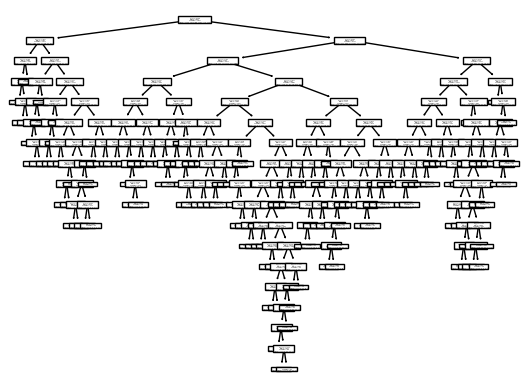

Árvore 25 com ccp_alpha = 0.0003516689452489237


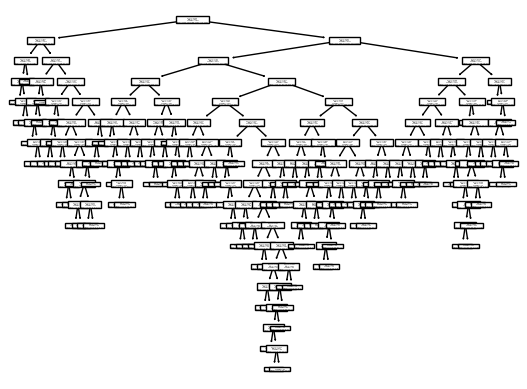

Árvore 26 com ccp_alpha = 0.00037356444558905855


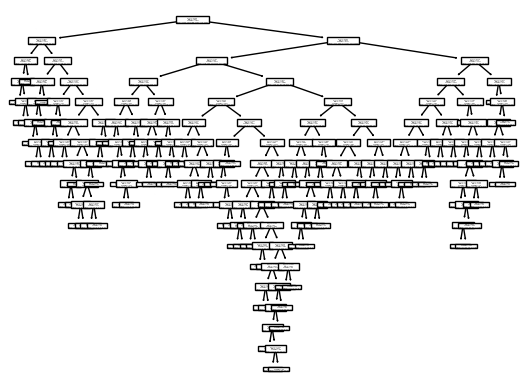

Árvore 27 com ccp_alpha = 0.000399220299793104


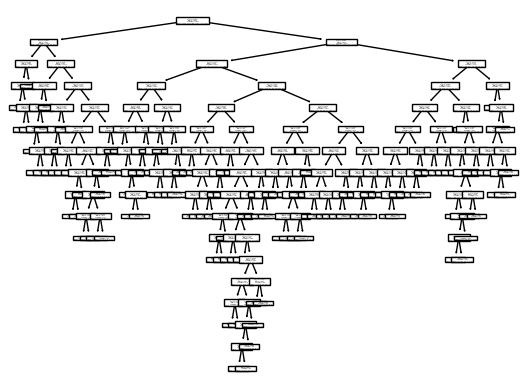

Árvore 28 com ccp_alpha = 0.00042986275325560447


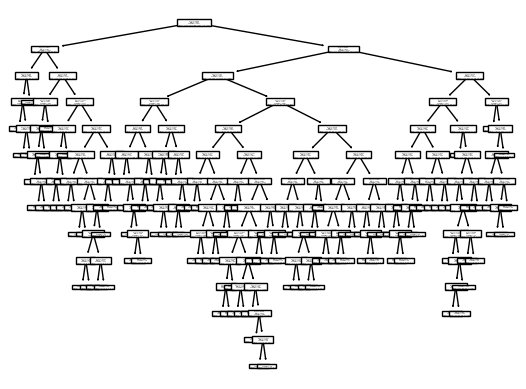

Árvore 29 com ccp_alpha = 0.00045152841197691404


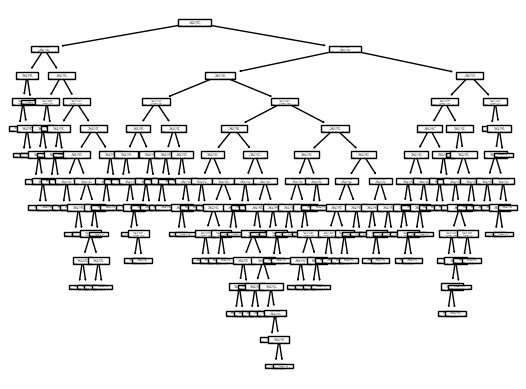

Árvore 30 com ccp_alpha = 0.00046307909893249233


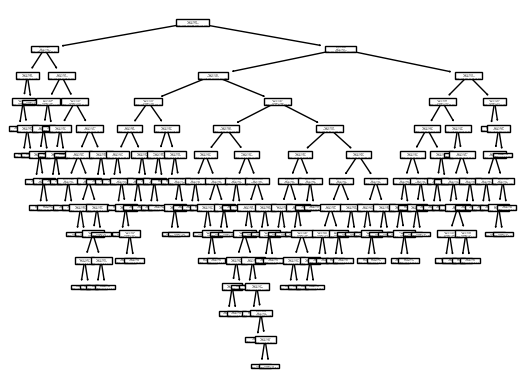

Árvore 31 com ccp_alpha = 0.00048720888182458323


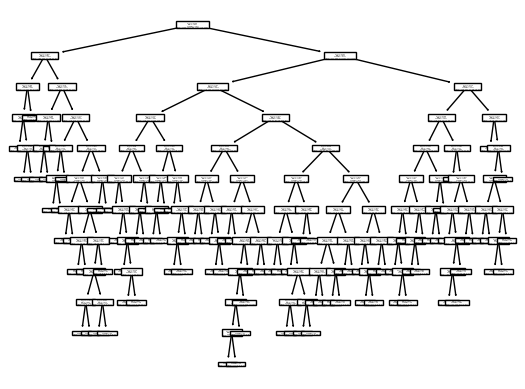

Árvore 32 com ccp_alpha = 0.0005117949783562635


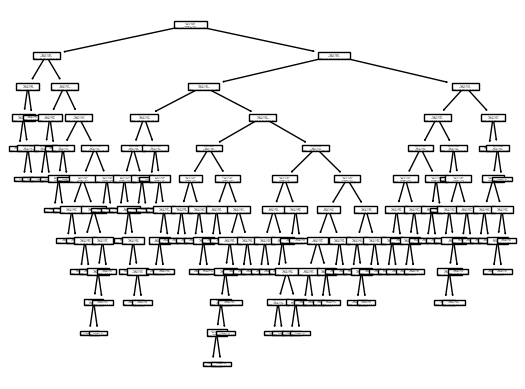

Árvore 33 com ccp_alpha = 0.000525732428971918


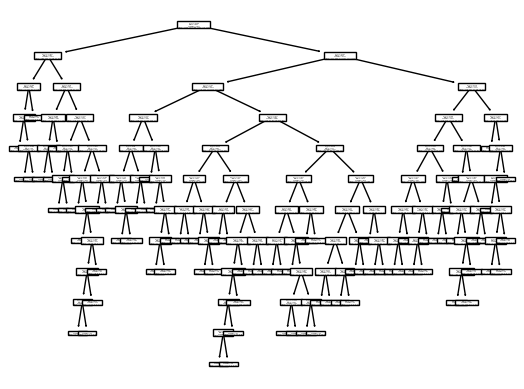

Árvore 34 com ccp_alpha = 0.0005562865520291078


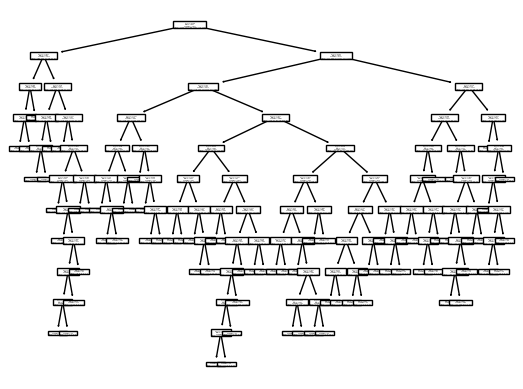

Árvore 35 com ccp_alpha = 0.0006378833806744569


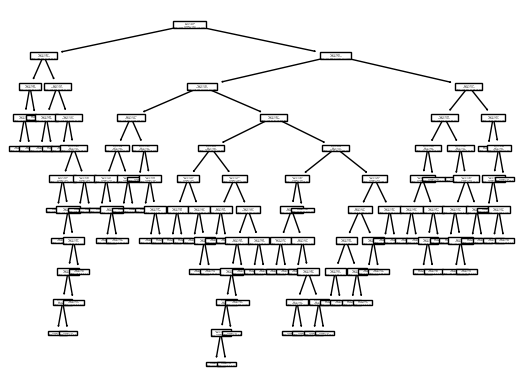

Árvore 36 com ccp_alpha = 0.0007020507904621064


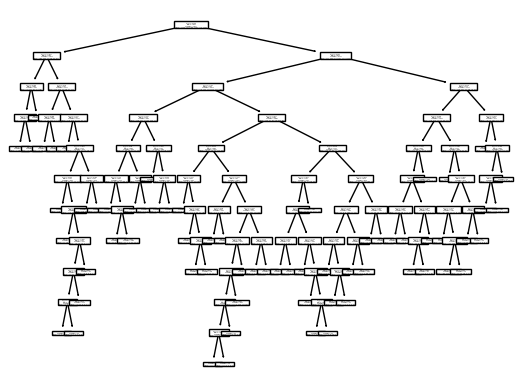

Árvore 37 com ccp_alpha = 0.0007537358191533061


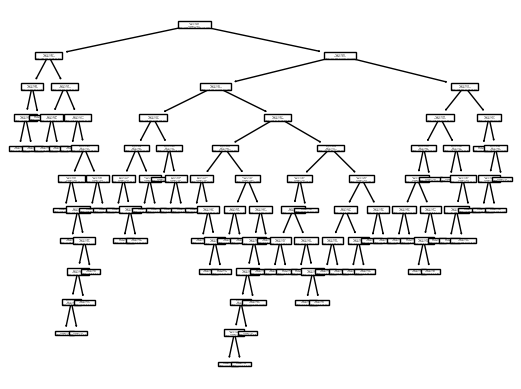

Árvore 38 com ccp_alpha = 0.0008649503905874337


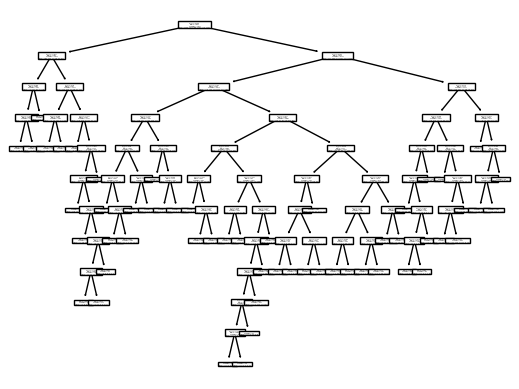

Árvore 39 com ccp_alpha = 0.0009293765604794606


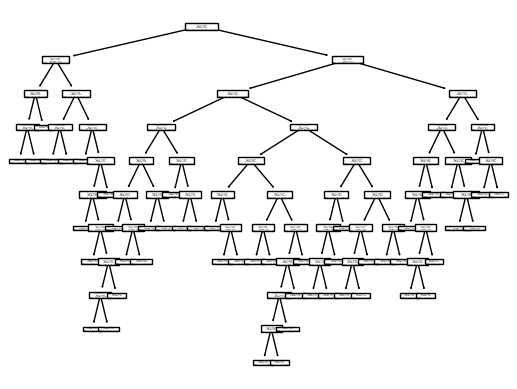

Árvore 40 com ccp_alpha = 0.0011324084281097747


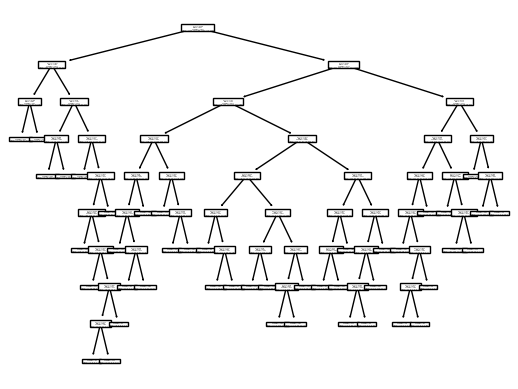

Árvore 41 com ccp_alpha = 0.0012419763785593563


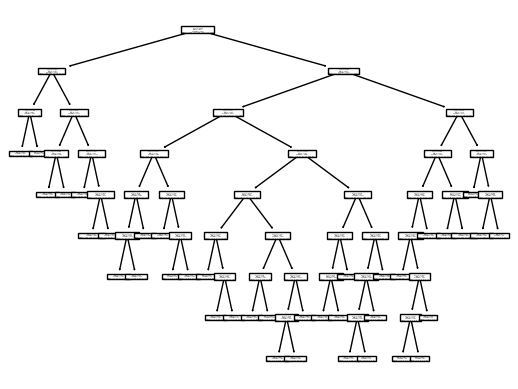

Árvore 42 com ccp_alpha = 0.0016523069472359699


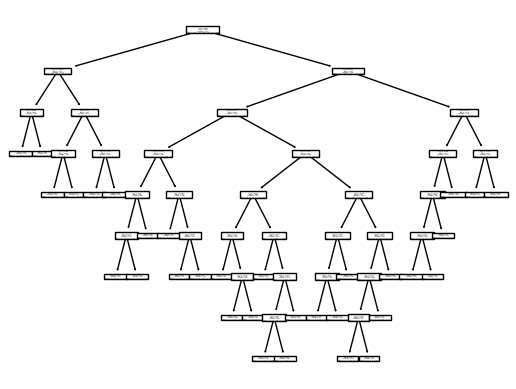

Árvore 43 com ccp_alpha = 0.0021876558689947756


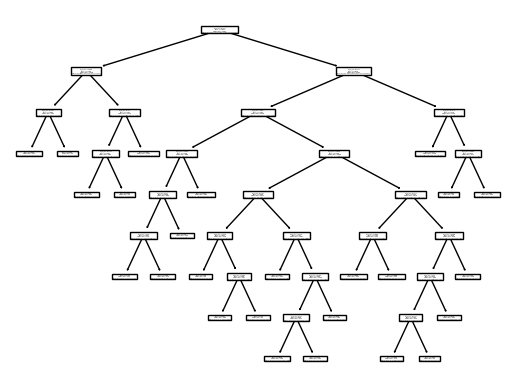

Árvore 44 com ccp_alpha = 0.0026678897926028858


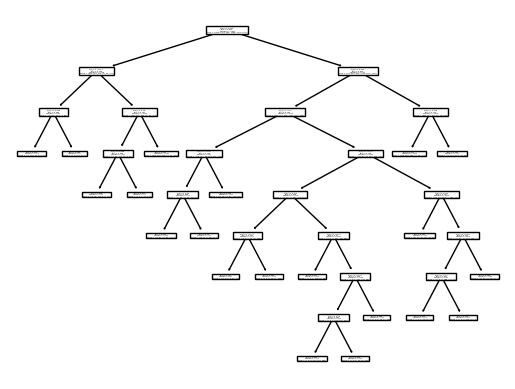

Árvore 45 com ccp_alpha = 0.0031300187975540107


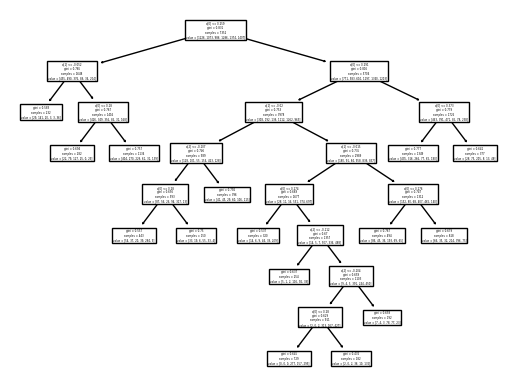

Árvore 46 com ccp_alpha = 0.004730061257202711


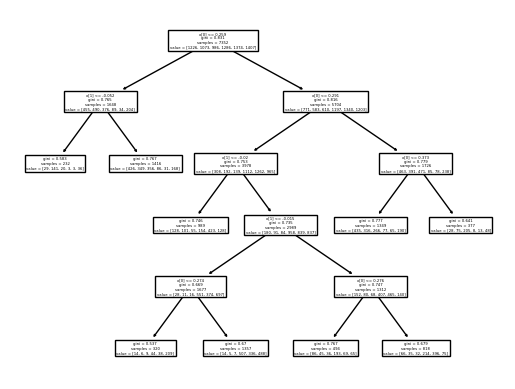

Árvore 47 com ccp_alpha = 0.010539508224667177


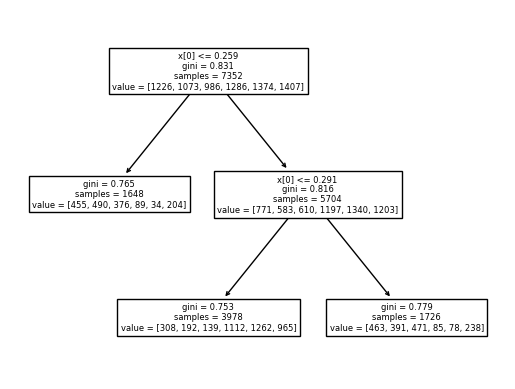

Accuracy da última árvore: 0.3000
CPU times: total: 6min 41s
Wall time: 7min 35s


In [51]:
%%time

# Selecionando as três primeiras colunas de interesse:
cols_of_interest = ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']

# Carregando os dados de treino e teste:
X_train_selected = X_train[cols_of_interest]
X_test_selected = X_test[cols_of_interest]

y_train = pd.read_csv('y_train.txt', header=None, names=['activity'])
y_test = pd.read_csv('y_test.txt', header=None, names=['activity'])

# Ajustando a árvore de decisão com número mínimo de observações por folha = 20:
clf = DecisionTreeClassifier(min_samples_leaf=20)
clf.fit(X_train_selected, y_train)

# Calculando ccp_alphas e remover valores negativos:
path = clf.cost_complexity_pruning_path(X_train_selected, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[ccp_alphas > 0]  # Filtrar apenas valores positivos
ccp_alphas = np.unique(ccp_alphas)  # Selecionar apenas valores únicos

# Selecionando 1 a cada 5 valores de ccp_alpha:
ccp_alphas = ccp_alphas[::5]

# Ajustando uma árvore de decisão para cada valor de ccp_alpha:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=ccp_alpha)
    clf.fit(X_train_selected, y_train)
    clfs.append(clf)

# Exibindo as árvores e avaliando a última árvore:
for i, clf in enumerate(clfs):
    print(f"Árvore {i+1} com ccp_alpha = {ccp_alphas[i]}")
    plot_tree(clf)
    plt.show()

# Avaliação da última árvore:
y_pred = clfs[-1].predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy da última árvore: {accuracy:.4f}")


### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [58]:
%%time
# Ajustar a árvore de decisão com número mínimo de observações por folha = 20
clf = DecisionTreeClassifier(min_samples_leaf=20)
clf.fit(X_train_selected, y_train)

# Calcular ccp_alphas
path = clf.cost_complexity_pruning_path(X_train_selected, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[ccp_alphas > 0]  # Filtrar apenas valores positivos
ccp_alphas = np.unique(ccp_alphas)  # Selecionar apenas valores únicos

# Selecionar 1 a cada 5 valores de ccp_alpha
ccp_alphas = ccp_alphas[::5]

# Ajustar uma árvore de decisão para cada valor de ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(min_samples_leaf=20, ccp_alpha=ccp_alpha)
    clf.fit(X_train_selected, y_train)
    clfs.append(clf)


CPU times: total: 1.48 s
Wall time: 1.54 s


In [60]:
train_accuracies = []
test_accuracies = []

for clf in clfs:
    train_pred = clf.predict(X_train_selected)
    test_pred = clf.predict(X_test_selected)
    
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)


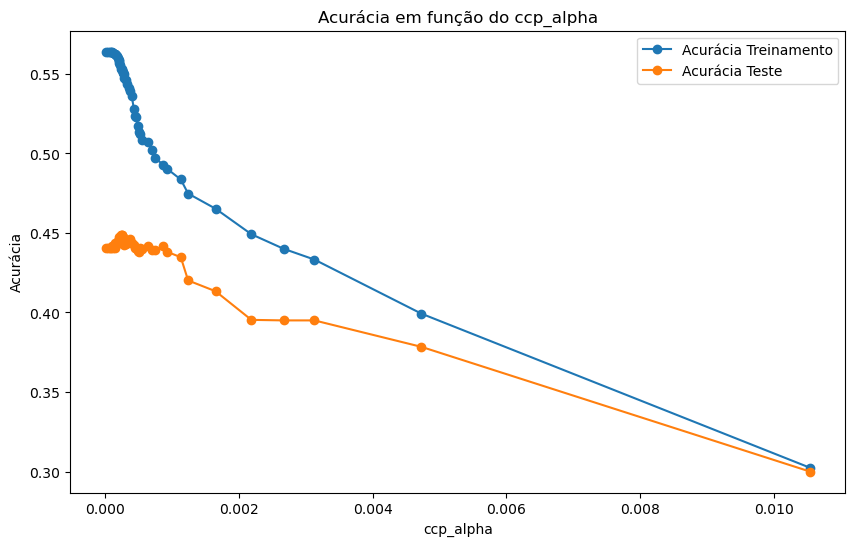

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_accuracies, marker='o', label='Acurácia Treinamento')
plt.plot(ccp_alphas, test_accuracies, marker='o', label='Acurácia Teste')
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.title('Acurácia em função do ccp_alpha')
plt.legend()
plt.show()


In [64]:
# Identificar o índice da melhor acurácia na base de teste
best_index = np.argmax(test_accuracies)
best_ccp_alpha = ccp_alphas[best_index]
best_clf = clfs[best_index]
best_test_accuracy = test_accuracies[best_index]

print(f"Melhor ccp_alpha: {best_ccp_alpha}")
print(f"Melhor acurácia na base de teste: {best_test_accuracy:.4f}")


Melhor ccp_alpha: 0.00023944476959803082
Melhor acurácia na base de teste: 0.4486
